In [355]:
# all the libraries
from bs4 import BeautifulSoup
import requests as req
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [356]:
venues = {
    'xtremeverbierswitzerland' : 'Verbier',
    'ordinoarcalisandorra' : 'Ordino Arcalis',
    'fieberbrunnaustria' : 'Fieberbrunn',
    'kickinghorsegoldenbc' : 'Kicking Horse',
    'hakubajapan' : 'Hakuba',
    'vallnordarcalisandorra' : 'Ordino Arcalis',
    'xtremeverbier' : 'Verbier',
    'hainesalaska' : 'Haines',
    'fieberbrunn' : 'Fieberbrunn',
    'chamonixmontblancstagedvallnordarcalisandorra' : 'Chamonix Montblanc',
    'fieberbrunnkitzbuheleralpen' : 'Fieberbrunn',
    'chamonixmontblanc' : 'Chamonix Montblanc',
    'alaska' : 'Haines',
    'fieberbrunnkitzbueheleralpen' : 'Fieberbrunn',
    'snowbird' : 'Snowbird',
    'chamonix' : 'Chamonix Montblanc',
    'courmayeur' : 'Courmayeur',
    'verbierxtreme' : 'Verbier',
    'fieberbrunnpillerseetal' : 'Fieberbrunn',
    'kirkwood' : 'Kirkwood',
    'courmayeurmontblanc' : 'Courmayeur',
    'revelstoke' : 'Revelstoke',
    'roldal' : 'Roldal',
    'crystalmountain' : 'Crystal',
    'sochi' : 'Sochi',
    'engadinsnow' : 'Engadin',
    'squawvalley' : 'Squaw Valley',
    'tignes' : 'Tignes',
    'mammoth' : 'Mammoth'
}

In [357]:
def strip(string):
    test = string.replace('-','')

    test = test.replace('freerideworldtour','')
    test = test.replace('swatch','')
    test = test.replace('northface','')
    test = test.replace('tnf','')
    test = re.sub('\d','',test)
    return test

In [358]:
# all the links read from a file
file = open('links.txt', 'r')
raw_links = file.readlines()
links = []
# strip the /n chars
for link in raw_links:
    links.append(link.strip())
file.close()

# number of male riders per event 
numbers = [13,13,20,20,21,22,24,24,25,25,13,12,23,25,24,14,25,25,29,15,16,29,32,29,15,29,32,35,32,13,29,
           31,33,33,28,14,21,21,22,23,23,15,20,19,19,21,21,8,19,22,22,18,22,20,21,16,19,17,19,14,12,11,10]

# some numbers were duplicates on the 2019 websites. This is just a catch exception annoying but what can u do
dupe = [(True,0),(False,0),(True,4),(True,9),(True,9),(True,20),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),
        (False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),
        (False,0),(False,0), (False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),
        (False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),
       (False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),
       (False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0),(False,0)]

In [359]:
def fill_data(event,dupe_status,duplicate,number_of):
    
    # get content and analyze data
    url = "https://www.freerideworldtour.com/event/{}/results".format(event)
    r = req.get(url)
    html = r.content
    soup = BeautifulSoup(html,'html.parser')
    name_find = soup.find_all('span',{"class":'name'})
    pos_find = soup.find_all('span',{"class": "position"})
    score_find = soup.find_all('span',{"class":'total-points'})
    
    # parse scraped data into arrays after getting text and stripping 
    names = []
    pos = []
    score = []
    for name in name_find:
        names.append(name.getText().strip())
    for position in pos_find:
        pos.append(position.getText().strip())
    for scores in score_find:
        score.append(scores.getText().strip())
        
    # delete any duplicate characters (manual operation)
    if dupe_status is True:
        del pos[duplicate]
    
    # create data frame
    event_results = pd.DataFrame()
    skiers = names[0:number_of]
    event_results['Name'] = pd.Series(skiers)
    event_results['Position'] = pd.Series(pos)
    event_results['Score-a'] = pd.Series(score)
    # translate event link using dict
    event_results['Event'] = venues[strip(event)]
    # year is usually at the end except for three cases see clean_up()
    #
    #
    event_results['Year'] = re.sub('\D', '', event)
    
    return event_results

In [360]:
def clean_up():
    
    
    test_lists = []
    # concatenate the data after creating the 'big set'
    for i in range(0,len(numbers)):
        test_lists.append(fill_data(links[i],dupe[i][0],dupe[i][1],numbers[i]))
    
    frame = pd.concat(test_lists).reset_index(drop=True)
    
    # replace text with years for exception links
    
    # translate scores to numeric using a string cleanup
    num_scores = []
    for score in frame['Score-a']:
        num_scores.append(score[:-5])
    
    # fit in the DataFrame
    frame['Score'] = pd.Series(num_scores)
    frame['Score'] = pd.to_numeric(frame['Score'])
    frame['Position'] = pd.to_numeric(frame['Position'])
    
    return frame

In [361]:
def freq_tables():
    frame = f
    unq_name = frame['Name'].unique()
    mean_pos = []
    std_dev = []
    appearances = []
    mean_points = []
    
    for name in unq_name:
        placeholder = frame[frame['Name'].eq(name)]
        appearances.append(len(frame[frame['Name'].eq(name)]))
        mean_pos.append(round(placeholder['Position'].mean(),0))
        std_dev.append(np.std(placeholder['Position']))
        mean_points.append(placeholder['Score'].mean())
        
    mean_frame = pd.DataFrame()
    mean_frame['Name'] = pd.Series(unq_name)
    mean_frame['Appearances'] = pd.Series(appearances)
    mean_frame['Mean'] = pd.Series(mean_pos)
    mean_frame['Standard Deviation'] = pd.Series(std_dev)
    mean_frame['Mean Score'] = pd.Series(mean_points)
    
    return mean_frame

In [362]:
f = clean_up()

In [508]:
f_1 = freq_tables()
f_1

,Name,Appearances,Mean,Standard Deviation,Mean Score
0,Wadeck Gorak,5,10.0,7.059745,1365.000000
1,Leo Slemett,28,11.0,8.616178,1293.571429
2,Kristofer Turdell,19,6.0,5.923333,1679.210526
3,Reine Barkered,55,8.0,6.860354,1514.090909
4,Mickael Bimboes,14,13.0,10.109603,1209.357143
...,...,...,...,...,...
136,Schroder Baker,1,11.0,0.000000,1025.000000
137,Chris Davenport,1,3.0,0.000000,1980.000000
138,Jean-Yves Michellod,2,4.0,3.000000,1940.000000
139,Edouard Baud,1,5.0,0.000000,1640.000000


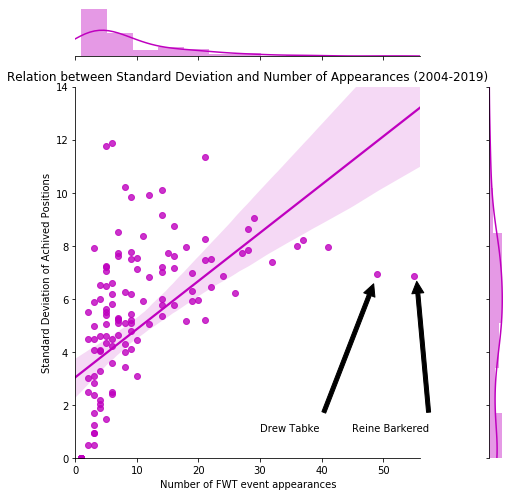

In [499]:
sns.jointplot("Appearances", "Standard Deviation", data=f_1, 
                  kind="reg", truncate=False,
                  xlim=(0, 56), ylim=(0, 14), color="m", height=7)
plt.title("Relation between Standard Deviation and Number of Appearances (2004-2019)")
plt.tight_layout()
plt.xlabel('Number of FWT event appearances')
plt.ylabel('Standard Deviation of Achived Positions')
plt.annotate('Drew Tabke', xy=(49, 6.9), xytext=(30, 1),arrowprops=dict(facecolor='black', shrink=0.06))
plt.annotate('Reine Barkered', xy=(55.3, 7), xytext=(45, 1),arrowprops=dict(facecolor='black', shrink=0.06))
plt.savefig('std.png', bbox_inches = 'tight')
plt.show()

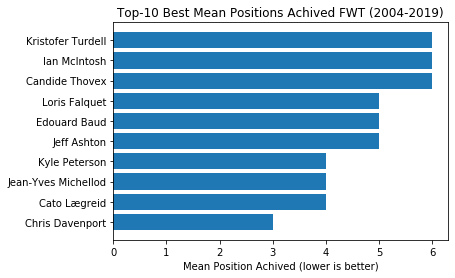

In [451]:
plot = f_1.sort_values(by='Mean',ascending=True)[0:10]
plt.barh(plot['Name'], plot['Mean'],align='center')
plt.title("Top-10 Best Mean Positions Achived FWT (2004-2019)")
plt.xlabel('Mean Position Achived (lower is better)')
plt.savefig('best_mean.png', bbox_inches = 'tight')
plt.show()